<a href="https://colab.research.google.com/github/heidaralavi/Gas-Prj/blob/main/Gas_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# گندله سازی اردکان
بررسی میزان مصرف گاز با برخی پارامترهای مهم

ابتدا توابع مورد نیاز را ایمپورت می کنیم

In [1]:
!pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest,RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import scale , normalize, minmax_scale,RobustScaler,MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import xgboost as xgb
from google.colab import files


In [3]:
def Download_to_local_drive(File_Name):
  plt.savefig(File_Name)
  files.download(File_Name)

دریافت داده های اولیه

In [4]:
url = 'https://raw.githubusercontent.com/heidaralavi/Gas-Prj/main/total.csv'
df=pd.read_csv(url)
#df=pd.read_csv('input-data.csv')
df.head()

,Unnamed: 0,Moisture_600,Blaine_After_HPGR,Tfe_Before_Mixer,FeO_Before_Mixer,Online_hours,Grate_Feed(ton),Grate_Speed(rpm),Depth(mm),EP1_Temp(deg),EP2_Temp(deg),Grate_Zoon3_Temp(deg),Grate_Zoon4_Temp(deg),Amb_Temp(deg),KL1_Speed(rpm),AN1_Speed(rpm),730FN1_Damper,730FN1_Amp,AN1_Zoon3_Temp(deg),Gas_Consumption(Nm3)
0,0,9.068056,1944.333333,66.943333,21.596667,23.000000,12130.79,6.178099,129.977407,113.830519,96.924823,823.695961,947.918406,16.426996,1.720463,1.722029,33.128261,185.063912,141.628364,196364.0
1,1,8.997183,2014.000000,66.873333,21.420000,23.533333,12383.61,6.197217,130.267644,111.230717,97.945284,791.477252,928.687125,16.367289,1.720708,1.634924,32.501389,183.892294,145.570481,209304.0
2,2,8.795833,2036.909091,66.873333,21.246667,23.400000,12413.71,5.976046,133.678219,111.999794,99.243076,830.765571,939.656421,18.876778,1.720636,1.650556,31.961806,180.630365,173.127236,206200.0
3,3,8.850536,2028.555556,66.986667,21.990000,23.583333,12277.02,5.978728,129.616905,114.068555,102.256167,825.551090,924.538606,21.236601,1.720821,1.590273,31.493056,177.220492,179.281210,203772.0
4,4,9.006061,2034.181818,67.096667,21.846667,19.883333,9942.13,4.718885,138.999936,115.877855,100.122762,724.071424,910.241250,18.896511,1.708230,1.278280,26.135069,163.096300,129.430960,200120.0


رسم ترند مصرف گاز

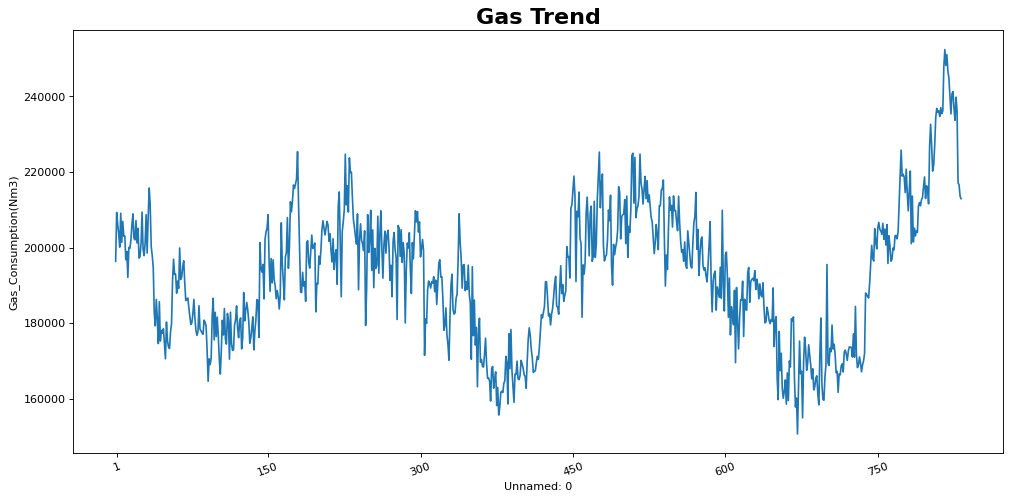

In [5]:
plt.figure(figsize=(15,7),dpi=80)
plt.xticks(ticks=[1,150,300,450,600,750,1000,1150],rotation=20)
plt.title('Gas Trend', fontsize=20,fontweight='bold')
sns.lineplot(x=df.iloc[:,0] , y=df.iloc[:,19], data=df )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

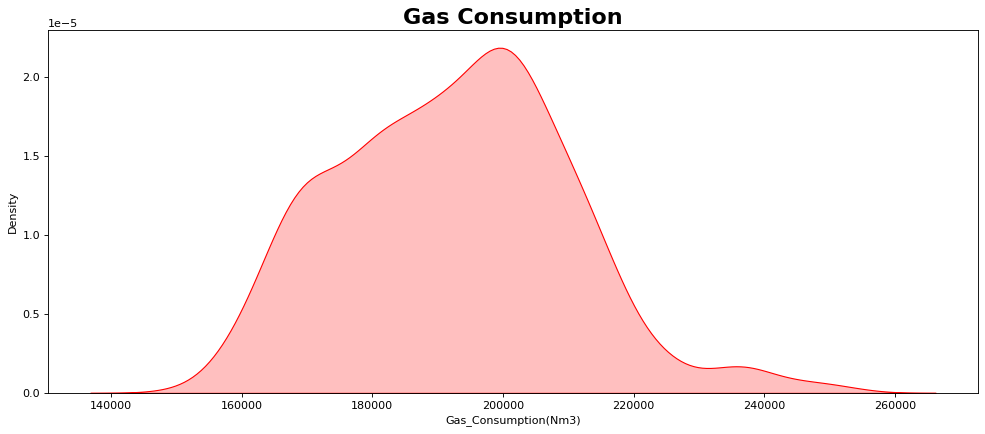

In [6]:
plt.figure(figsize=(15,6),dpi=80)
plt.title('Gas Consumption', fontsize=20,fontweight='bold')
sns.kdeplot(df.iloc[:,19], shade=True , color='r')
#Download to local drive
File_Name='Gas_Consumption.jpg'
Download_to_local_drive(File_Name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

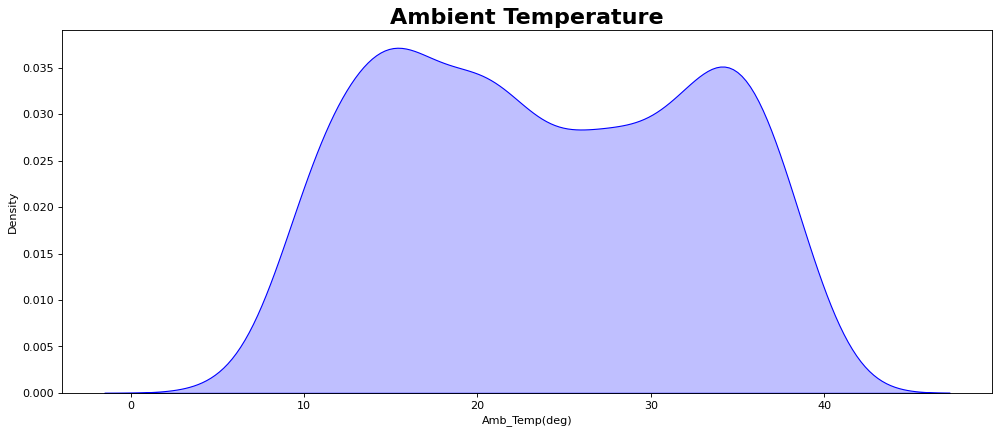

In [ ]:
plt.figure(figsize=(15,6),dpi=80)
#plt.xticks(ticks=[0,190000,210000],rotation=0)
plt.title('Ambient Temperature', fontsize=20,fontweight='bold')
sns.kdeplot(df.iloc[:,13], shade=True , color='b')
#Download to local drive
File_Name='Ambient_Temperature.jpg'
Download_to_local_drive(File_Name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

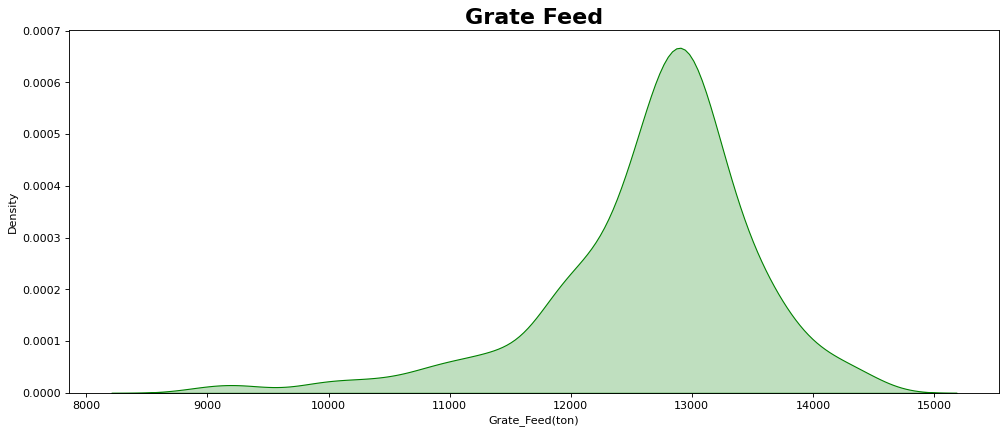

In [ ]:
plt.figure(figsize=(15,6),dpi=80)
#plt.xticks(ticks=[0,190000,210000],rotation=0)
plt.title('Grate Feed', fontsize=20,fontweight='bold')
sns.kdeplot(df.iloc[:,6], shade=True , color='g')
#Download to local drive
File_Name='Grate_Feed.jpg'
Download_to_local_drive(File_Name)

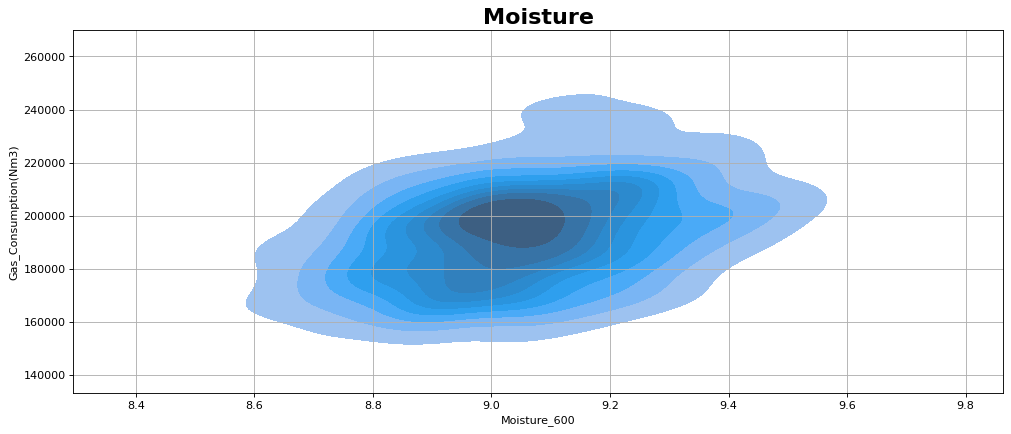

In [7]:
plt.figure(figsize=(15,6),dpi=80)
plt.title('Moisture', fontsize=20,fontweight='bold')
plt.grid()
sns.kdeplot(data=df, x=df.iloc[:,1] , y=df.iloc[:,19],fill=True, levels=10,)
#Download to local drive
#File_Name='Moisture.jpg'
#Download_to_local_drive(File_Name)

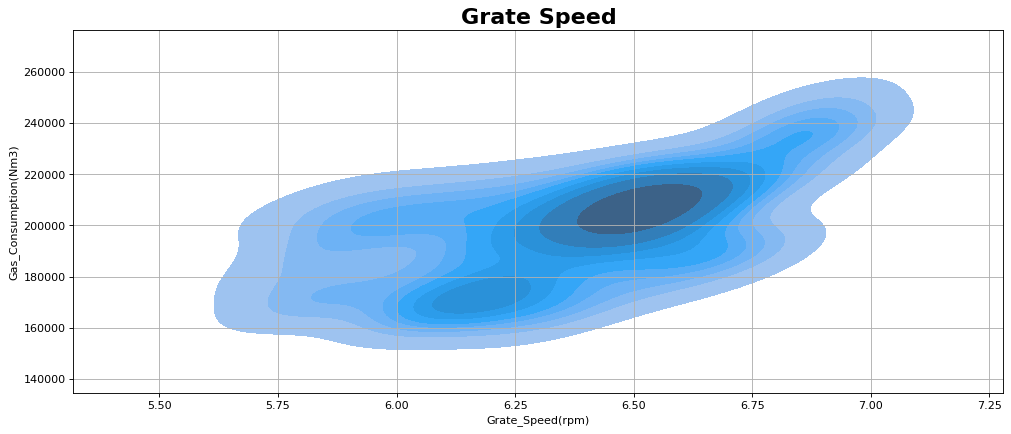

In [39]:
plt.figure(figsize=(15,6),dpi=80)
plt.title('Grate Speed', fontsize=20,fontweight='bold')
plt.grid()
#x=df[df['Grate_Feed(ton)'] >= 0].iloc[:,7]

#sns.kdeplot(data=df, x=df.iloc[:,7] , y=df.iloc[:,19],fill=True, levels=10)
sns.kdeplot(data=df, x=df[df['Grate_Feed(ton)'] >= 13000].iloc[:,7] , y=df[df['Grate_Feed(ton)'] >= 13000].iloc[:,19],fill=True, levels=10)
#sns.scatterplot(data=df, x=df[df['Grate_Feed(ton)'] >= 12500].iloc[:,7] , y=df[df['Grate_Feed(ton)'] >= 12500].iloc[:,19],color='red')
plt.show()
#Download to local drive
#File_Name='Grate_Speed.jpg'
#Download_to_local_drive(File_Name)

In [35]:
x=df[df['Grate_Feed(ton)'] >= 13000].iloc[:,7]
x.describe()

count    293.000000
mean       6.370103
std        0.306295
min        5.674945
25%        6.160105
50%        6.425217
75%        6.581565
max        6.922985
Name: Grate_Speed(rpm), dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

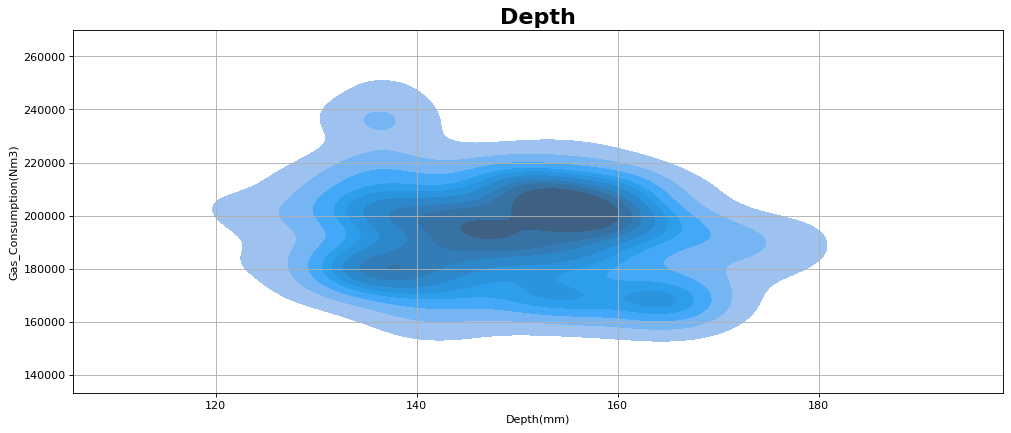

In [ ]:
plt.figure(figsize=(15,6),dpi=80)
plt.title('Depth', fontsize=20,fontweight='bold')
plt.grid()
sns.kdeplot(data=df, x=df.iloc[:,8] , y=df.iloc[:,19],fill=True, levels=10)
#Download to local drive
File_Name='Depth.jpg'
Download_to_local_drive(File_Name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

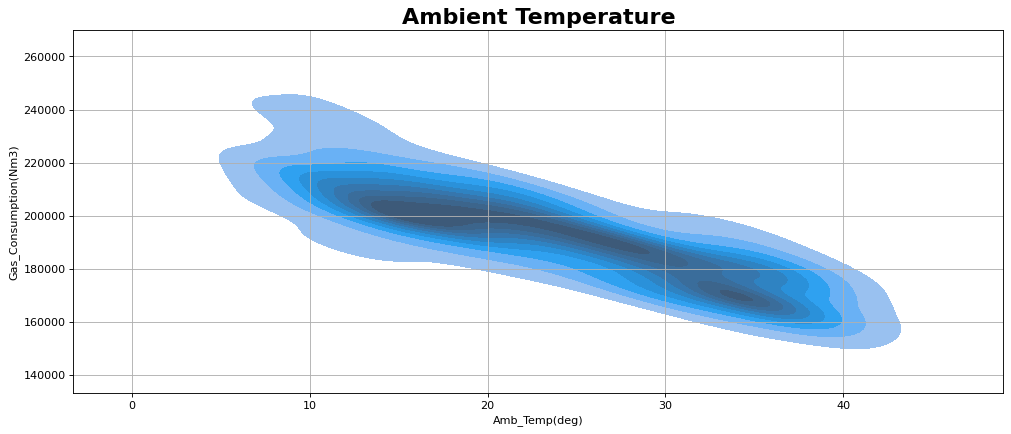

In [ ]:
plt.figure(figsize=(15,6),dpi=80)
plt.title('Ambient Temperature', fontsize=20,fontweight='bold')
plt.grid()
sns.kdeplot(data=df, x=df.iloc[:,13] , y=df.iloc[:,19],fill=True, levels=10)
#Download to local drive
File_Name='Ambient_Temperature2.jpg'
Download_to_local_drive(File_Name)

حذف ستون اول

In [ ]:
df.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
df.describe()

,Moisture_600,Blaine_After_HPGR,Tfe_Before_Mixer,FeO_Before_Mixer,Online_hours,Grate_Feed(ton),Grate_Speed(rpm),Depth(mm),EP1_Temp(deg),EP2_Temp(deg),Grate_Zoon3_Temp(deg),Grate_Zoon4_Temp(deg),Amb_Temp(deg),KL1_Speed(rpm),AN1_Speed(rpm),730FN1_Damper,730FN1_Amp,AN1_Zoon3_Temp(deg),Gas_Consumption(Nm3)
count,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000
mean,9.051683,1925.900156,67.283515,22.970011,23.635654,12666.656525,5.953794,148.998307,123.773546,104.299819,794.361406,1005.345707,23.771869,1.629696,1.646727,37.753763,184.022561,150.584143,192549.032413
std,0.186291,132.799676,0.446596,1.177806,0.944665,866.876664,0.493131,12.003290,12.745685,9.701684,43.756338,73.228601,8.906420,0.082435,0.132719,5.026365,11.817579,25.895775,17739.094177
min,8.476923,1547.444444,65.805000,19.260000,17.100000,8883.130000,4.096760,117.594789,99.933404,65.826530,592.749281,802.767262,5.423704,1.304804,1.142890,26.135069,130.982433,68.615551,150690.000000
25%,8.928125,1833.250000,66.966667,22.110000,23.850000,12336.590000,5.674945,138.791111,115.225608,99.922459,770.267505,975.325634,15.951052,1.550350,1.590858,35.007639,180.090826,133.834894,179528.000000
50%,9.048611,1916.125000,67.300000,22.980000,24.000000,12813.570000,5.966310,149.301746,120.658599,104.188875,798.571399,1027.858257,23.312076,1.656069,1.646369,36.515972,185.436625,151.506718,192960.000000
75%,9.184615,2012.400000,67.596667,23.856667,24.000000,13148.700000,6.298250,157.747765,129.936738,110.715197,828.915299,1055.112569,31.863337,1.699737,1.706237,37.796528,190.978177,168.059598,204330.000000
max,9.681429,2288.666667,68.330000,25.503333,24.000000,14510.030000,6.922985,186.652068,195.568567,127.353284,872.397282,1303.756288,40.288171,1.780731,1.944085,50.481944,199.896767,199.714990,252402.000000


نرمال سازی داده ها

In [ ]:
col=df.columns
data=df.values

In [ ]:
trans = MinMaxScaler()
normal_data = trans.fit_transform(data)

In [ ]:
normal_df=pd.DataFrame(normal_data,columns=col)

In [ ]:
normal_df.describe()

,Moisture_600,Blaine_After_HPGR,Tfe_Before_Mixer,FeO_Before_Mixer,Online_hours,Grate_Feed(ton),Grate_Speed(rpm),Depth(mm),EP1_Temp(deg),EP2_Temp(deg),Grate_Zoon3_Temp(deg),Grate_Zoon4_Temp(deg),Amb_Temp(deg),KL1_Speed(rpm),AN1_Speed(rpm),730FN1_Damper,730FN1_Amp,AN1_Zoon3_Temp(deg),Gas_Consumption(Nm3)
count,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000
mean,0.477175,0.510583,0.585551,0.594236,0.947196,0.672400,0.657072,0.454746,0.249282,0.625310,0.720950,0.404357,0.526271,0.682651,0.628856,0.477215,0.769653,0.625240,0.411545
std,0.154661,0.179163,0.176870,0.188650,0.136908,0.154059,0.174484,0.173816,0.133274,0.157682,0.156469,0.146168,0.255458,0.173210,0.165652,0.206448,0.171482,0.197528,0.174405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.374595,0.385587,0.460066,0.456487,0.978261,0.613741,0.558407,0.306938,0.159901,0.554164,0.634792,0.344435,0.301951,0.515933,0.559124,0.364423,0.712601,0.497480,0.283526
50%,0.474625,0.497395,0.592079,0.595836,1.000000,0.698509,0.661501,0.459140,0.216711,0.623507,0.736004,0.449293,0.513083,0.738065,0.628410,0.426375,0.790172,0.632277,0.415585
75%,0.587538,0.627282,0.709571,0.736252,1.000000,0.758067,0.778951,0.581445,0.313727,0.729580,0.844512,0.503694,0.758355,0.829819,0.703133,0.478971,0.870584,0.758539,0.527371
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# بررسی اولیه داده ها

دیتاها را نسبت به هم ترسیم می کنیم تا دیدی کلی از داده ها بدست آوریم

ماتریس ضریب همبستگی دیتاها را محاسبه و ترسیم می کنیم

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

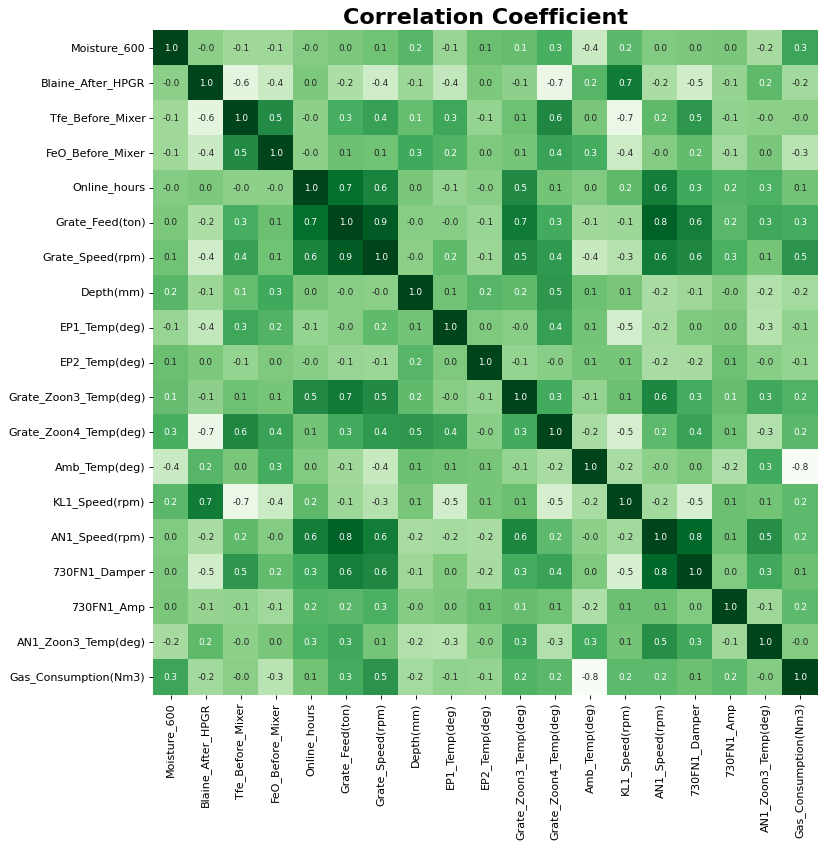

In [ ]:
corr = normal_df.corr()
plt.figure(figsize=(15,11),dpi=80)
plt.title('Correlation Coefficient', fontsize=20,fontweight='bold')
sns.heatmap(corr, cbar=False,square= True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Greens')
#Download to local drive
File_Name='Correlation_Coefficient.jpg'
Download_to_local_drive(File_Name)

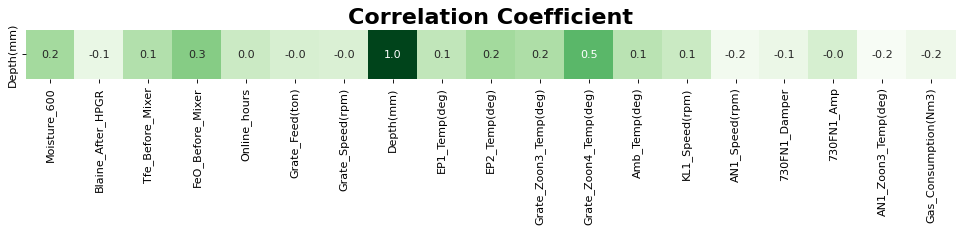

In [ ]:
plt.figure(figsize=(15,11),dpi=80)
plt.title('Correlation Coefficient', fontsize=20,fontweight='bold')
sns.heatmap(corr.iloc[7:8,0:19], cbar=False,square= True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Greens')

بررسی اهمیت پاارامترهای ورودی روی مصرف گاز

In [ ]:
# split into input and output elements
X, y = normal_data[:, :-1], normal_data[:, -1]

In [ ]:
model = DecisionTreeRegressor(random_state=123)
model = model.fit(X,y)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

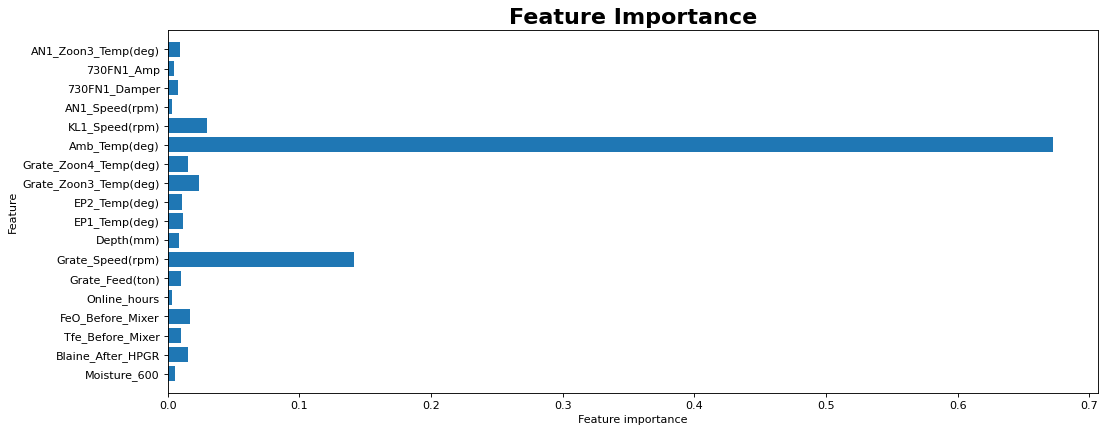

In [ ]:
plt.figure(figsize=(15,6),dpi=80)
plt.title('Feature Importance', fontsize=20,fontweight='bold')
n_features = len(col)-1
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(len(col)-1), col[:-1])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)
#Download to local drive
File_Name='Feature_Importance.jpg'
Download_to_local_drive(File_Name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

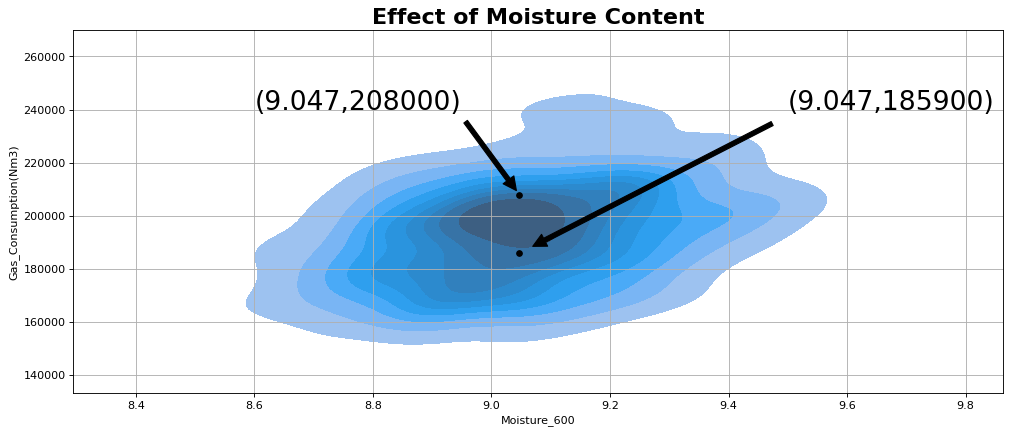

In [ ]:
plt.figure(figsize=(15,6),dpi=80)
plt.grid()
plt.title('Effect of Moisture Content', fontsize=20,fontweight='bold')
plt.annotate('(9.047,185900)', xy=(9.047, 185900), xytext=(9.5, 240000),arrowprops=dict(facecolor='black', shrink=0.05),fontsize=24)
plt.annotate('(9.047,208000)', xy=(9.047, 208000), xytext=(8.6, 240000),arrowprops=dict(facecolor='black', shrink=0.05),fontsize=24)
plt.plot([9.047], [185900],marker=".",  markersize=10,color='black')
plt.plot([9.047], [208000],marker=".",  markersize=10,color='black') 
sns.kdeplot(data=df, x=df.iloc[:,0] , y=df.iloc[:,18],fill=True, levels=10,cbar=False)
#Download to local drive
File_Name='Effect_of_Moisture_Content.jpg'
Download_to_local_drive(File_Name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

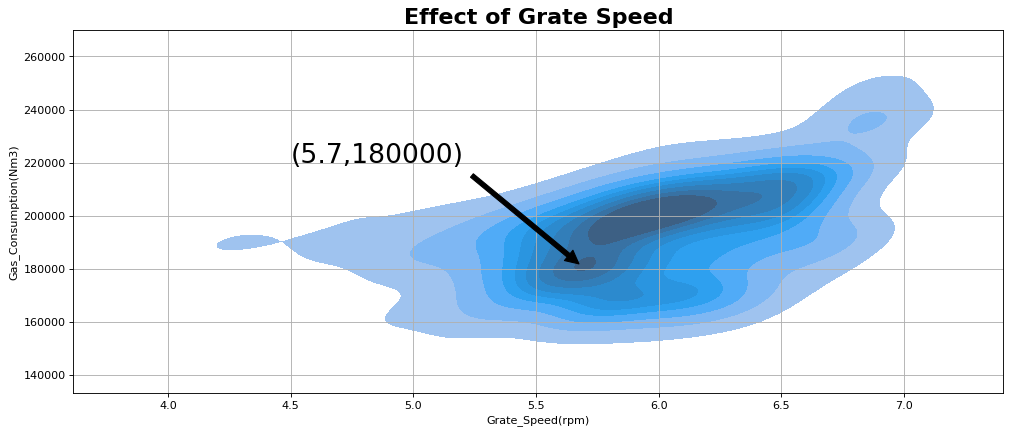

In [ ]:
plt.figure(figsize=(15,6),dpi=80)
plt.title('Effect of Grate Speed', fontsize=20,fontweight='bold')
plt.annotate('(5.7,180000)', xy=(5.7, 180000), xytext=(4.5, 220000),arrowprops=dict(facecolor='black', shrink=0.05),fontsize=24)
plt.grid()
sns.kdeplot(data=df, x=df.iloc[:,6] , y=df.iloc[:,18],fill=True, levels=10)
#Download to local drive
File_Name='Effect_of_Grate_Speed.jpg'
Download_to_local_drive(File_Name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

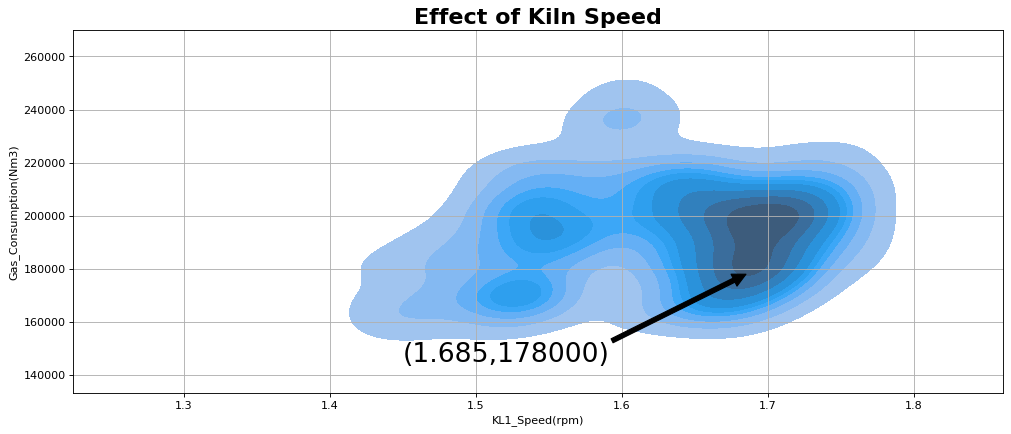

In [ ]:
plt.figure(figsize=(15,6),dpi=80)
plt.title('Effect of Kiln Speed', fontsize=20,fontweight='bold')
plt.annotate('(1.685,178000)', xy=(1.685, 178000), xytext=(1.45, 145000),arrowprops=dict(facecolor='black', shrink=0),fontsize=24)
plt.grid()
sns.kdeplot(data=df, x=df.iloc[:,13] , y=df.iloc[:,18],fill=True, levels=10)
#Download to local drive
File_Name='Effect_of_Kiln_Speed.jpg'
Download_to_local_drive(File_Name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

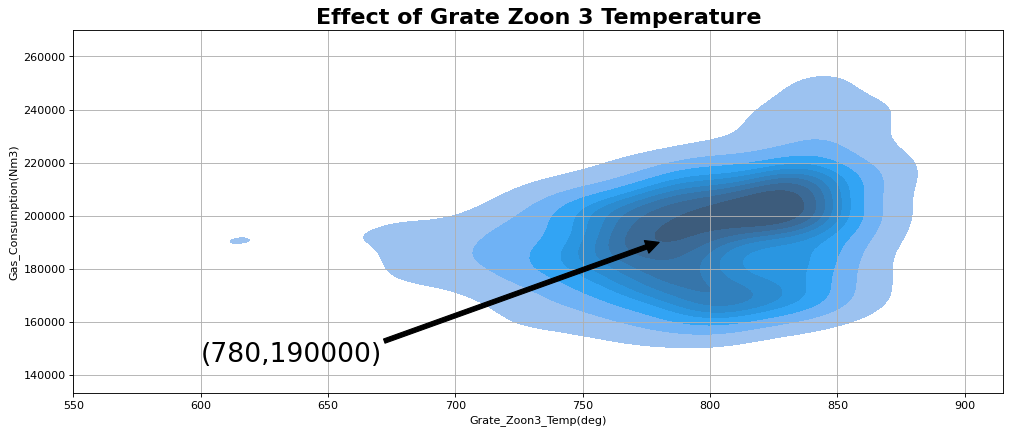

In [ ]:
plt.figure(figsize=(15,6),dpi=80)
plt.title('Effect of Grate Zoon 3 Temperature', fontsize=20,fontweight='bold')
plt.annotate('(780,190000)', xy=(780, 190000), xytext=(600, 145000),arrowprops=dict(facecolor='black', shrink=0),fontsize=24)
plt.grid()
sns.kdeplot(data=df, x=df.iloc[:,10] , y=df.iloc[:,18],fill=True, levels=10)
#Download to local drive
File_Name='Effect_of_Grate_Zoon 3_Temperature.jpg'
Download_to_local_drive(File_Name)

In [ ]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_test.shape,X_train.shape)

(250, 18) (583, 18)


In [ ]:
model = DecisionTreeRegressor(random_state=123)
model = model.fit(X_train,y_train)

In [ ]:
print("Accuracy on test: {:.2f} %".format(model.score(X_test, y_test)*100))

Accuracy on test: 77.84 %


In [ ]:
y_pred = model.predict(X_test)
print("R2 Score: {:.2f}%".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: 77.84%
Mean Absolute Error 0.06
Mean Squared Error 0.01


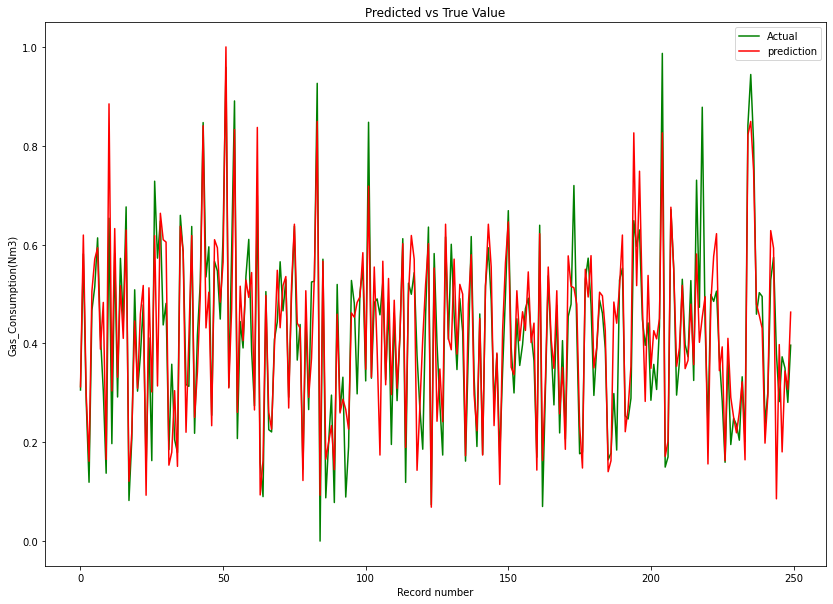

In [ ]:
plt.figure(figsize=(14,10))
plt.plot(range(250),y_test[0:250], color = "green")
plt.plot(range(250),model.predict(X_test[0:250]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(col[-1])
plt.show()

# استفاده از مدل رگرسیون خطی برای حل مسئله و حدس زدن جواب نمونه های آزمایشی

In [ ]:
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

مدل چقدر خوب آموزش دیده است؟

In [ ]:
ybar = model.predict(X_train)

In [ ]:
# evaluate predictions
mae = mean_absolute_error(y_train, ybar)
print('MAE: %.3f' %mae)

MAE: 0.053


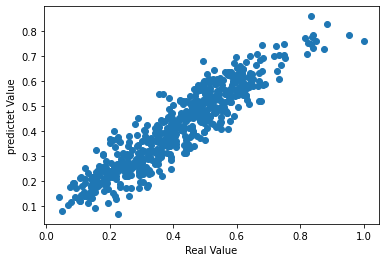

In [ ]:
plt.scatter(y_train, ybar)
plt.xlabel('Real Value')
plt.ylabel('predictet Value')
plt.show()

In [ ]:
print("The Train Score is ", (r2_score( y_train, ybar)))

The Train Score is  0.8477292604842251


مدل چقدر خوب حدس می زند؟

In [ ]:
# evaluate the model
yhat = model.predict(X_test)

In [ ]:
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' %mae)

MAE: 0.058


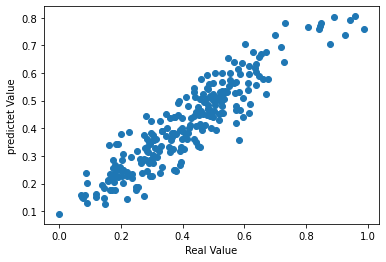

In [ ]:
plt.scatter(y_test,yhat)
plt.xlabel('Real Value')
plt.ylabel('predictet Value')
plt.show()

In [ ]:
print("The Predict Score is ", (r2_score( y_test,yhat)))


The Predict Score is  0.8386971187076381


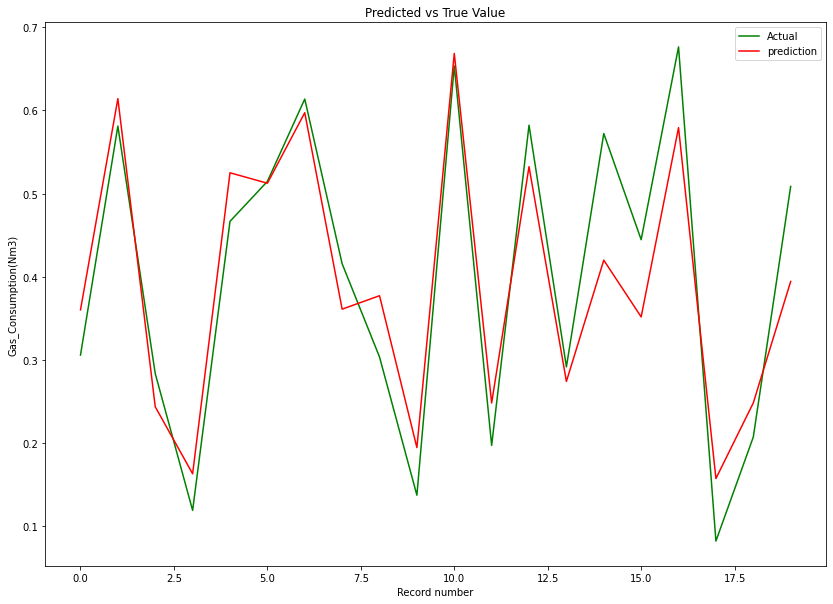

In [ ]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(X_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(col[-1])
plt.show()

# استفاده از شبکه عصبی برای حل مسئله و حدس زدن جواب نمونه های آزمایشی

In [ ]:
model = MLPRegressor(hidden_layer_sizes=(100,),activation="relu" ,random_state=1, max_iter=200000)
model.fit(X_train, y_train)


MLPRegressor(max_iter=200000, random_state=1)

مدل چقدر خوب آموزش دیده است؟

In [ ]:
ybar = model.predict(X_train)

In [ ]:
# evaluate predictions
mae = mean_absolute_error(y_train, ybar)
print('MAE: %.3f' %mae)

MAE: 0.059


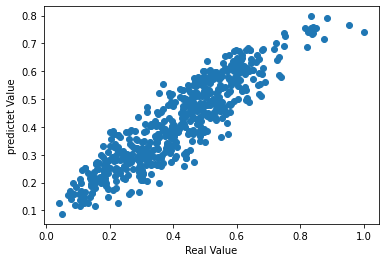

In [ ]:
plt.scatter(y_train, ybar)
plt.xlabel('Real Value')
plt.ylabel('predictet Value')
plt.show()

In [ ]:
print("The Train Score is ", (r2_score( y_train, ybar)))

The Train Score is  0.8148780454421856


مدل چقدر خوب حدس می زند؟

In [ ]:
# evaluate the model
yhat = model.predict(X_test)

In [ ]:
print("The Train Score is: ", (r2_score( y_test,yhat)))

The Train Score is:  0.8024211761226439


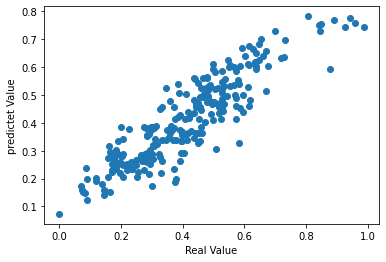

In [ ]:
plt.scatter(y_test,yhat)
plt.xlabel('Real Value')
plt.ylabel('predictet Value')
plt.show()

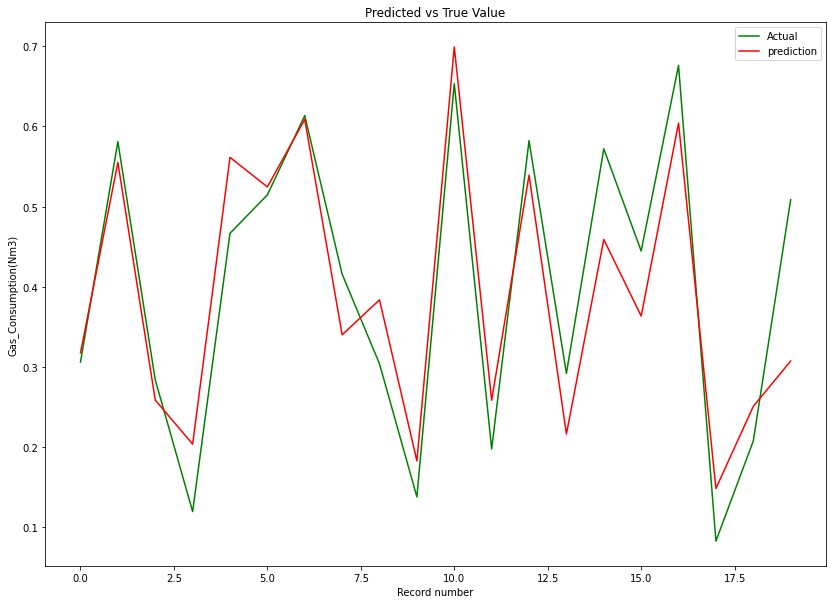

In [ ]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(X_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(col[-1])
plt.show()

# Decision Tree Regression

In [ ]:
model = DecisionTreeRegressor(random_state=123)
model = model.fit(X_train,y_train)

In [ ]:
print("Accuracy on test: {:.2f} %".format(model.score(X_test, y_test)*100))

Accuracy on test: 77.84 %


In [ ]:
y_pred = model.predict(X_test)
print("R2 Score: {:.2f}%".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: 77.84%
Mean Absolute Error 0.06
Mean Squared Error 0.01


In [ ]:
model.feature_importances_

array([0.00477549, 0.0102768 , 0.01420866, 0.02064312, 0.00418099,
       0.00248641, 0.12589002, 0.00612958, 0.00204717, 0.01140859,
       0.00990909, 0.01870665, 0.68273324, 0.03339508, 0.0051839 ,
       0.0149808 , 0.01928731, 0.01375712])

(-1.0, 18.0)

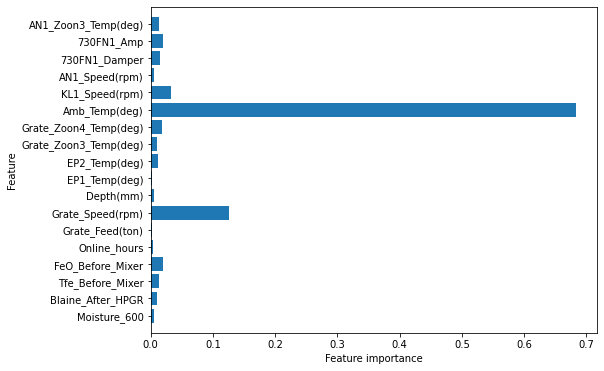

In [ ]:
plt.figure(figsize=(8,6))
n_features = len(col)-1
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(len(col)-1), col[:-1])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

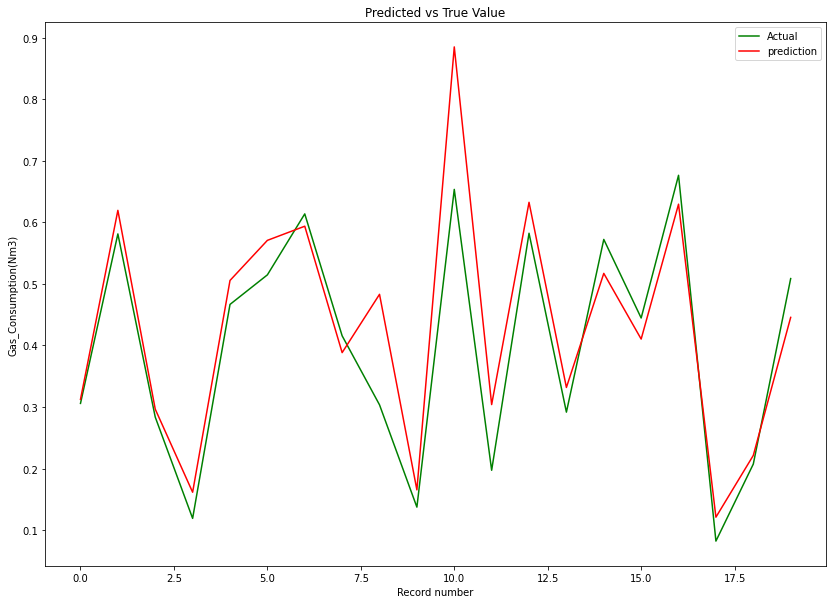

In [ ]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(X_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(col[-1])
plt.show()

# Support Vector Regression

In [ ]:
model=SVR()
model.fit(X_train,y_train)

SVR()

In [ ]:
print("Accuracy score {:.2f} %\n".format(model.score(X_test,y_test)*100))

Accuracy score 87.32 %



In [ ]:
y_pred = model.predict(X_test)
print("R2 Score: {:.2f}%".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: 87.32%
Mean Absolute Error 0.05
Mean Squared Error 0.00


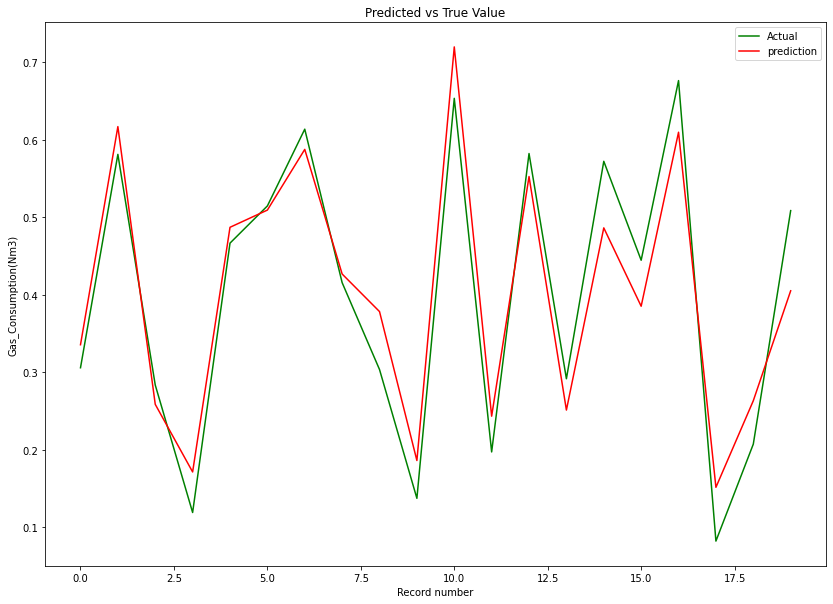

In [ ]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(X_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(col[-1])
plt.show()

# K-Nearest Neighbor Regressor

In [ ]:
model=KNeighborsRegressor(n_jobs=-1)
model.fit(X_train,y_train)

KNeighborsRegressor(n_jobs=-1)

In [ ]:
print("Accuracy score {:.2f} %\n".format(model.score(X_test,y_test)*100))

Accuracy score 84.76 %



In [ ]:
y_pred = model.predict(X_test)
print("R2 Score: {:.2f}%".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: 84.76%
Mean Absolute Error 0.05
Mean Squared Error 0.01


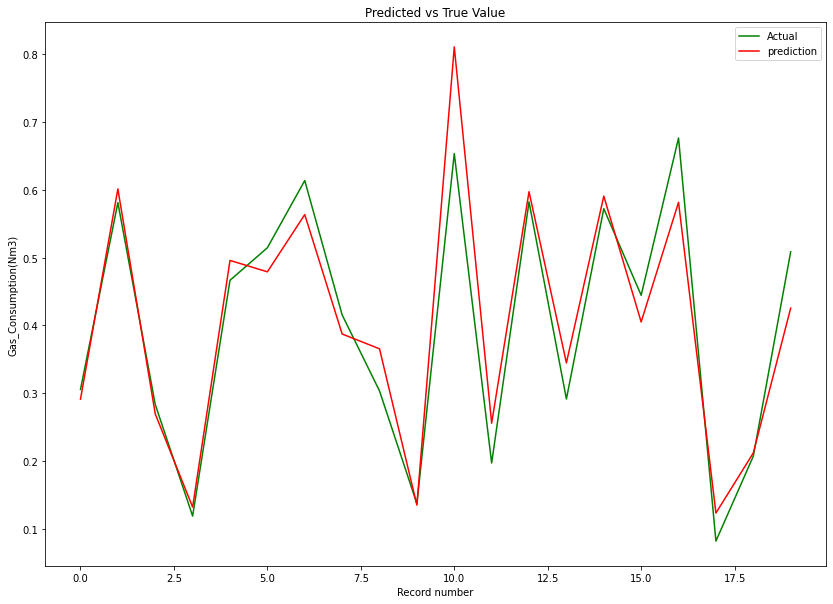

In [ ]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(X_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(col[-1])
plt.show()

# Random Forest Regressor

In [ ]:
model = RandomForestRegressor(n_jobs = -1,random_state = 123)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=123)

In [ ]:
print("Accuracy score {:.2f} %\n".format(model.score(X_test,y_test)*100))

Accuracy score 88.23 %



In [ ]:
y_pred = model.predict(X_test)
print("R2 Score: {:.2f}%".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: 88.23%
Mean Absolute Error 0.05
Mean Squared Error 0.00


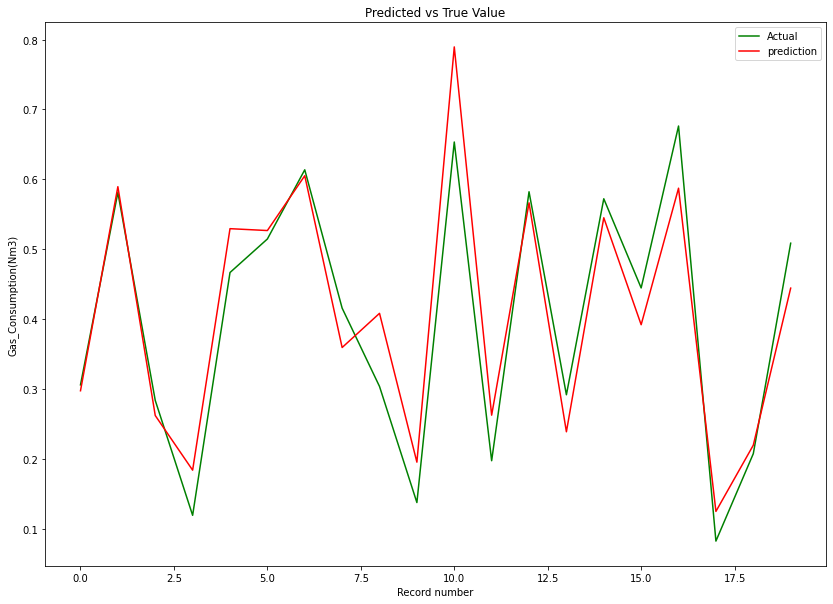

In [ ]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(X_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(col[-1])
plt.show()

(-1.0, 18.0)

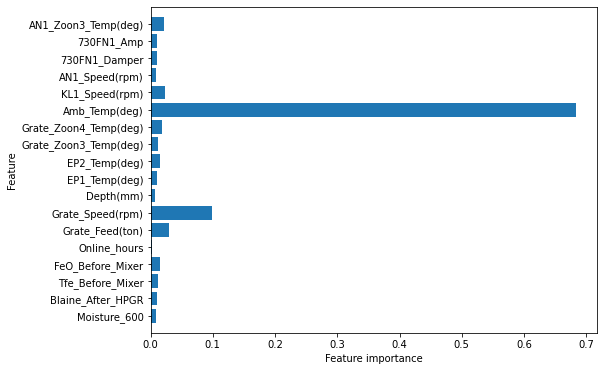

In [ ]:
plt.figure(figsize=(8,6))
n_features = len(col)-1
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(len(col)-1), col[:-1])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

# Gradient Boosting Regressor

In [ ]:
model = GradientBoostingRegressor(random_state = 123)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=123)

In [ ]:
print("Accuracy score {:.2f} %\n".format(model.score(X_test,y_test)*100))

Accuracy score 88.95 %



In [ ]:
y_pred = model.predict(X_test)
print("R2 Score: {:.2f}%".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: 88.95%
Mean Absolute Error 0.05
Mean Squared Error 0.00


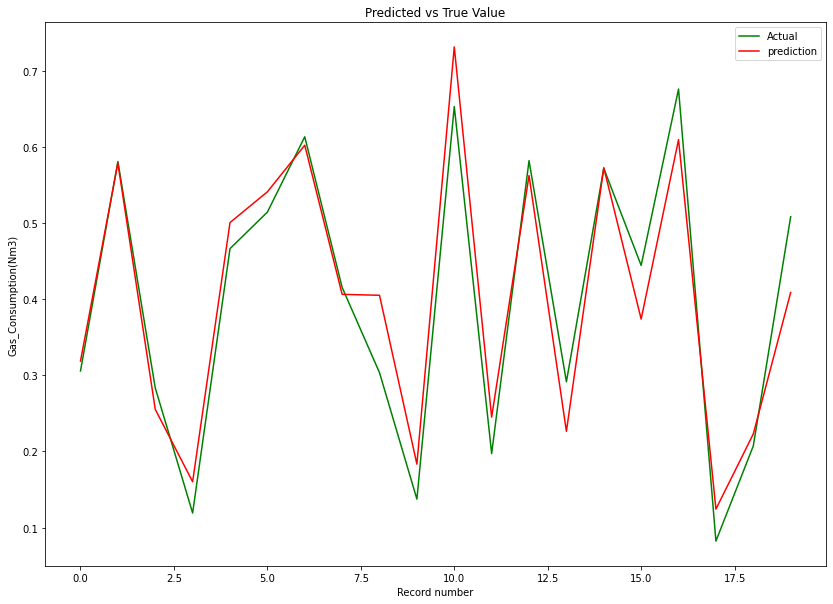

In [ ]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(X_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(col[-1])
plt.show()

(-1.0, 18.0)

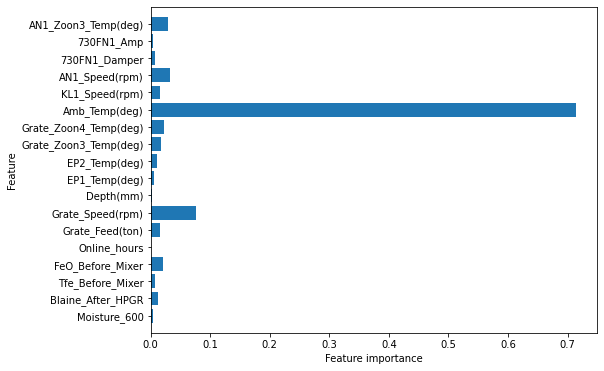

In [ ]:
plt.figure(figsize=(8,6))
n_features = len(col)-1
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(len(col)-1), col[:-1])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

# Extreme Gradient Boosting Regressor

In [ ]:
model = XGBRegressor(random_state = 123,n_jobs=-1)
model.fit(X_train, y_train)

[12:05:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_jobs=-1, random_state=123)

In [ ]:
print("Accuracy score {:.2f} %\n".format(model.score(X_test,y_test)*100))

Accuracy score 88.92 %



In [ ]:
y_pred = model.predict(X_test)
print("R2 Score: {:.2f}%".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: 88.92%
Mean Absolute Error 0.05
Mean Squared Error 0.00


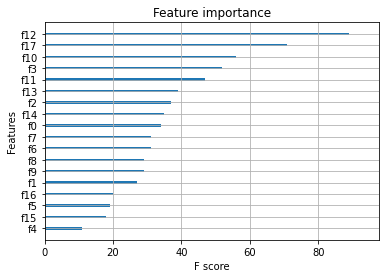

In [ ]:
xgb.plot_importance(model,importance_type="weight",show_values=False)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

(-1.0, 18.0)

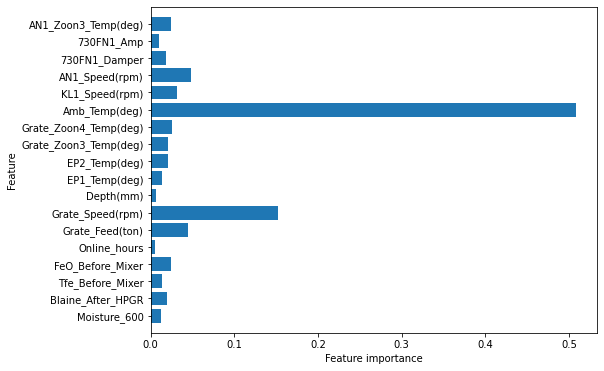

In [ ]:
plt.figure(figsize=(8,6))
n_features = len(col)-1
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(len(col)-1), col[:-1])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

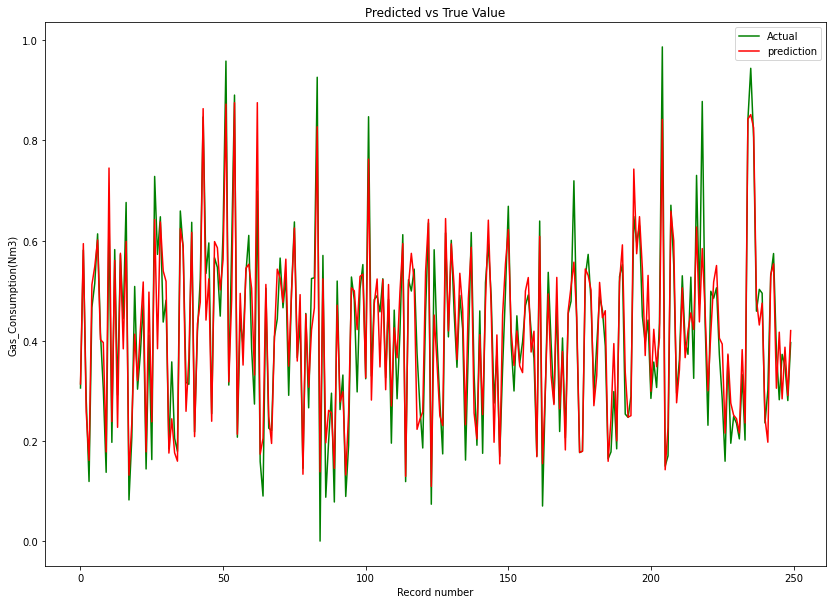

In [ ]:
plt.figure(figsize=(14,10))
plt.plot(range(250),y_test[0:250], color = "green")
plt.plot(range(250),model.predict(X_test[0:250]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(col[-1])
plt.show()